In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
train = pd.read_csv('train.csv')

In [3]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
target = train.pop('SalePrice')
display(pd.DataFrame(target))

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [5]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


## Looking at the distribution of our target variable

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

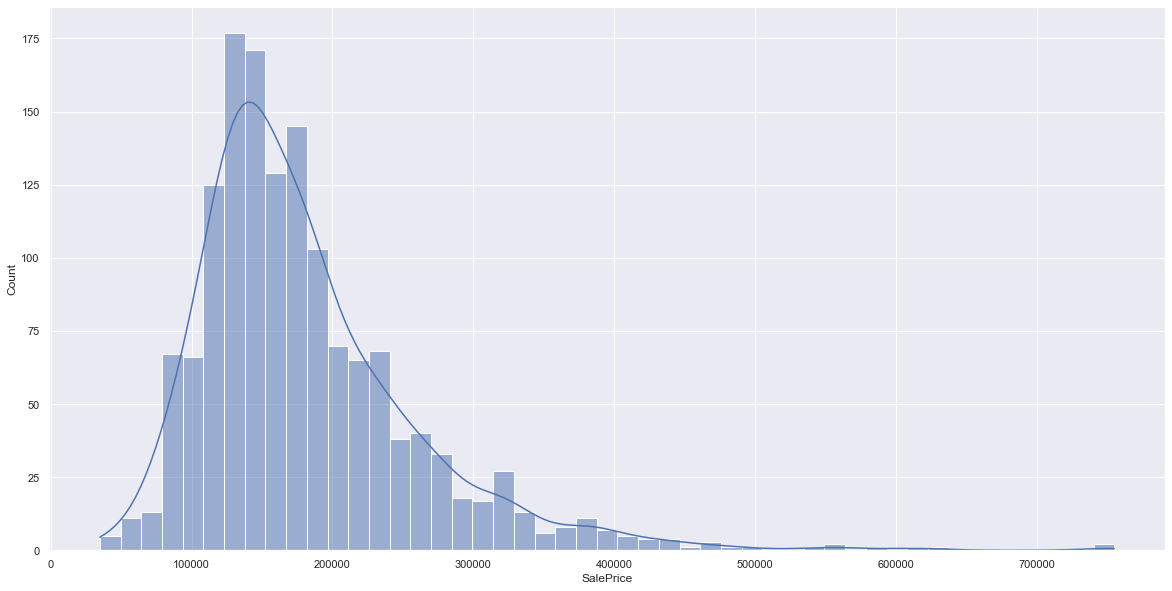

In [6]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(target, element='bars', kde=True, log_scale=False)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

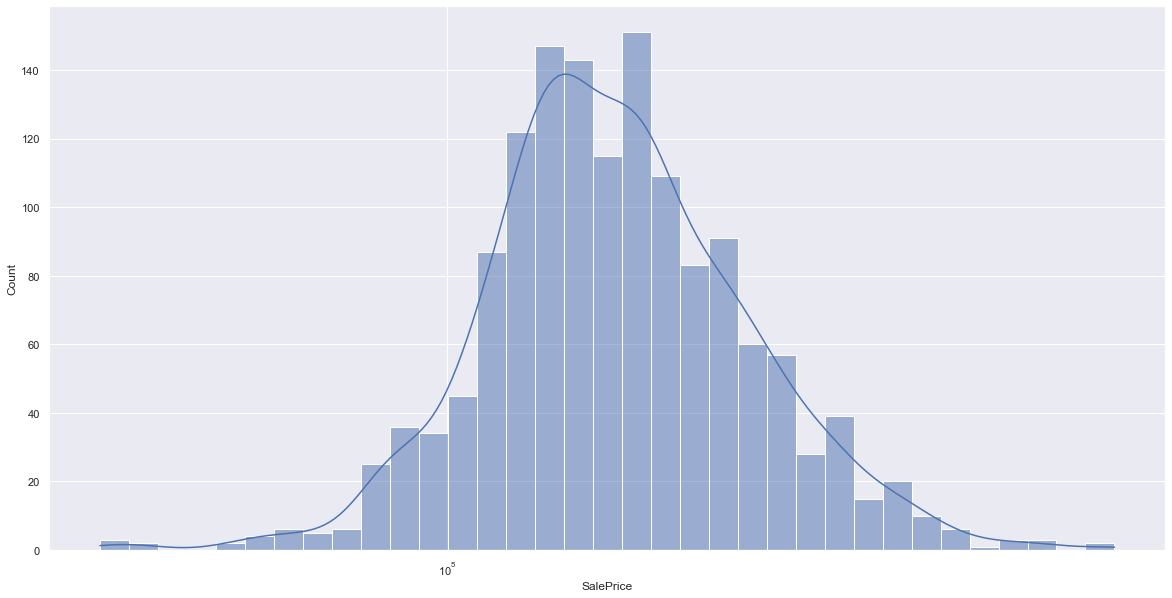

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(target, element='bars', kde=True, log_scale=True)

In [8]:
pvalue = scipy.stats.normaltest(np.array(np.log(target)))[1]
print("p-value of {:.8f}\n".format(pvalue))
if pvalue > 0.05:
    print("Probably normal distribution")
else:
    print("Not normal distribution")

p-value of 0.00000289

Not normal distribution


## Looking at other factors

#### Drop any unnecessary columns first

In [9]:
train.drop('Id', axis=1, inplace=True)

#### Check for any null values

In [10]:
pd.DataFrame(train.isna().sum().sort_values(ascending=False)[train.isna().sum().sort_values(ascending=False)!=0],columns=['Null values'])

,Null values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageQual,81
GarageCond,81


In [11]:
print("We have {} rows of data".format(len(train)))

We have 1460 rows of data


In [12]:
train['Alley'][train['Alley'].isna()==False].unique()

array(['Grvl', 'Pave'], dtype=object)

In [13]:
train['MiscFeature'][train['MiscFeature'].isna()==False].unique()

array(['Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [14]:
train['Fence'][train['Fence'].isna()==False].unique()

array(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [15]:
train['FireplaceQu'][train['FireplaceQu'].isna()==False].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [16]:
train['GarageYrBlt'][train['GarageYrBlt'].isna()==False].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1983., 1977., 1997., 1985., 1963.,
       1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [17]:
train['GarageYrBlt'][train['GarageYrBlt'].isna()==False].unique().max()

2010.0

#### We will allow for NaN values in some features and make sure to label encode them along with other unique values in our feature column

#### But now I will be feature engineering 'GarageYrBlt' to ensure it represents the amount of years the garage has existed for

In [18]:
train['GarageYrBlt'] = 2010 - train['GarageYrBlt']

#### Let's change the YrSold also

In [21]:
train['YrSold'] = 2010 - train['YrSold']

#### I wish to check for categorical and numerical features first

In [22]:
numerical = train.select_dtypes('number')
numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,3
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,4
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,3
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,0


In [39]:
categorical = train.select_dtypes(exclude='number')
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## For categorical data, we're going to label encode NaN values too so let's use scikit-learn's label encoder to do so

In [40]:
categorical.iloc[:,0].name

'MSZoning'

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical_map = {}

for i in range(len(categorical.iloc[0,:])):
    categorical.iloc[:,i] = le.fit_transform(categorical.iloc[:,i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    categorical_map[categorical.iloc[:,i].name] = le_name_mapping

#### categorical_map is there to show the mapping of the label encoder for future predictions

## Now for numerical inputs, let's see which columns have NaN values

In [45]:
numerical.isna().sum()[numerical.isna().sum().sort_values(ascending=False) != 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

#### As we can see the 'LotFrontage' and 'MasVnrArea' values of 0 is most likely due to the absence of these features in the property. So I'm going to impute it with a value of 0 instead of any other imputation method as I deem 0 to be the most realistic approach I can think of.
#### For the year the garage was built, I am also going to impute as 0 as we saw that I have engineered the feature to reflect how old the garage has been and a 0 value would be most fit for properties without a garage.

In [48]:
numerical.fillna(0, inplace=True)

In [49]:
numerical.isna().sum()[numerical.isna().sum().sort_values(ascending=False) != 0]

Series([], dtype: int64)

#### All NaN values are filled and now we just need to merge the datasets together

## Obtaining the final training dataset

In [55]:
train = numerical.join(categorical)

In [56]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,1,4,4,2,3,4,4,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,1,4,4,2,3,4,4,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,1,4,4,2,3,4,4,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,5,2,4,4,2,3,4,4,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,1,4,4,2,3,4,4,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,2,4,4,2,3,2,4,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,1,4,4,2,3,0,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,2,4,4,2,3,4,4,8,4


In [58]:
train.isna().sum()[train.isna().sum() != 0]

Series([], dtype: int64)

In [60]:
display(pd.DataFrame(target))

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [61]:
categorical_map

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Grvl': 0, 'Pave': 1, nan: 2},
 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, 'NoSeWa': 1},
 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'Blmngtn': 0,
  'Blueste': 1,
  'BrDale': 2,
  'BrkSide': 3,
  'ClearCr': 4,
  'CollgCr': 5,
  'Crawfor': 6,
  'Edwards': 7,
  'Gilbert': 8,
  'IDOTRR': 9,
  'MeadowV': 10,
  'Mitchel': 11,
  'NAmes': 12,
  'NPkVill': 13,
  'NWAmes': 14,
  'NoRidge': 15,
  'NridgHt': 16,
  'OldTown': 17,
  'SWISU': 18,
  'Sawyer': 19,
  'SawyerW': 20,
  'Somerst': 21,
  'StoneBr': 22,
  'Timber': 23,
  'Veenker': 24},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Norm': 2,
  'PosA': 3,
  'PosN': 4,
  'RRAe': 5,
  'RRAn': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Artery

## Seems like everything is correct

In [62]:
train.to_csv('cleaned_train.csv')
target.to_csv('cleaned_target.csv')